In [1]:
from yt.mods import *
from yt.units import km
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from yt.config import ytcfg

In [18]:
ds = load('object_100km_gcd/gcd_hdf5_plt_cnt_0000')
fig = plt.figure()
grid = AxesGrid(fig, (0.1,0.1,2.0,2.0),
                nrows_ncols = (1, 3),
                axes_pad = 1.0,
                label_mode = "L",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="3%",
                cbar_pad="0%")

fields = ['temp', 'ye  ','phfa']
p = SlicePlot(ds, 'theta', fields,origin='native')
p.set_buff_size(1600)
p.zoom(25)
p.set_center((-0.5,-0.0))
p.pan_rel((0.5, 0.0))
#p.annotate_grids()
lowdens = 1.e7
p.annotate_contour('dens',ncont=1, clim=(lowdens,lowdens),plot_args={"colors": "black",
                            "linewidths": 6})
p.annotate_timestamp(corner='lower_right', draw_inset_box=True,time_unit='s',time_format='t = {time:1.2f} {units}')
p.set_colorbar_label(fields[0],r'$\mathrm{Temperature}$')
p.set_colorbar_label(fields[1],r'$\mathrm{Ye}$')
p.set_colorbar_label(fields[2],r'$\mathrm{Phfa}$')

p.set_zlim(fields[0], 5.e6, 5.e9)

p.set_log(fields[1],False)
p.set_cmap(fields[1],'Spectral')
p.set_zlim(fields[1], 0.45e0 ,0.5e0)

p.set_log(fields[2],False)
p.set_cmap(fields[2],'summer')
p.set_zlim(fields[2], 0.0e0 ,1.0e0)

for i, field in enumerate(fields):
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]
p._setup_plots()
plt.show()

yt : [ERROR    ] 2016-05-24 23:45:16,086 None of the arguments provided to load() is a valid file
yt : [ERROR    ] 2016-05-24 23:45:16,086 Please check that you have used a correct path


YTOutputNotIdentified: Supplied ('object_100km_gcd/gcd_hdf5_plt_cnt_0000240',) {}, but could not load!

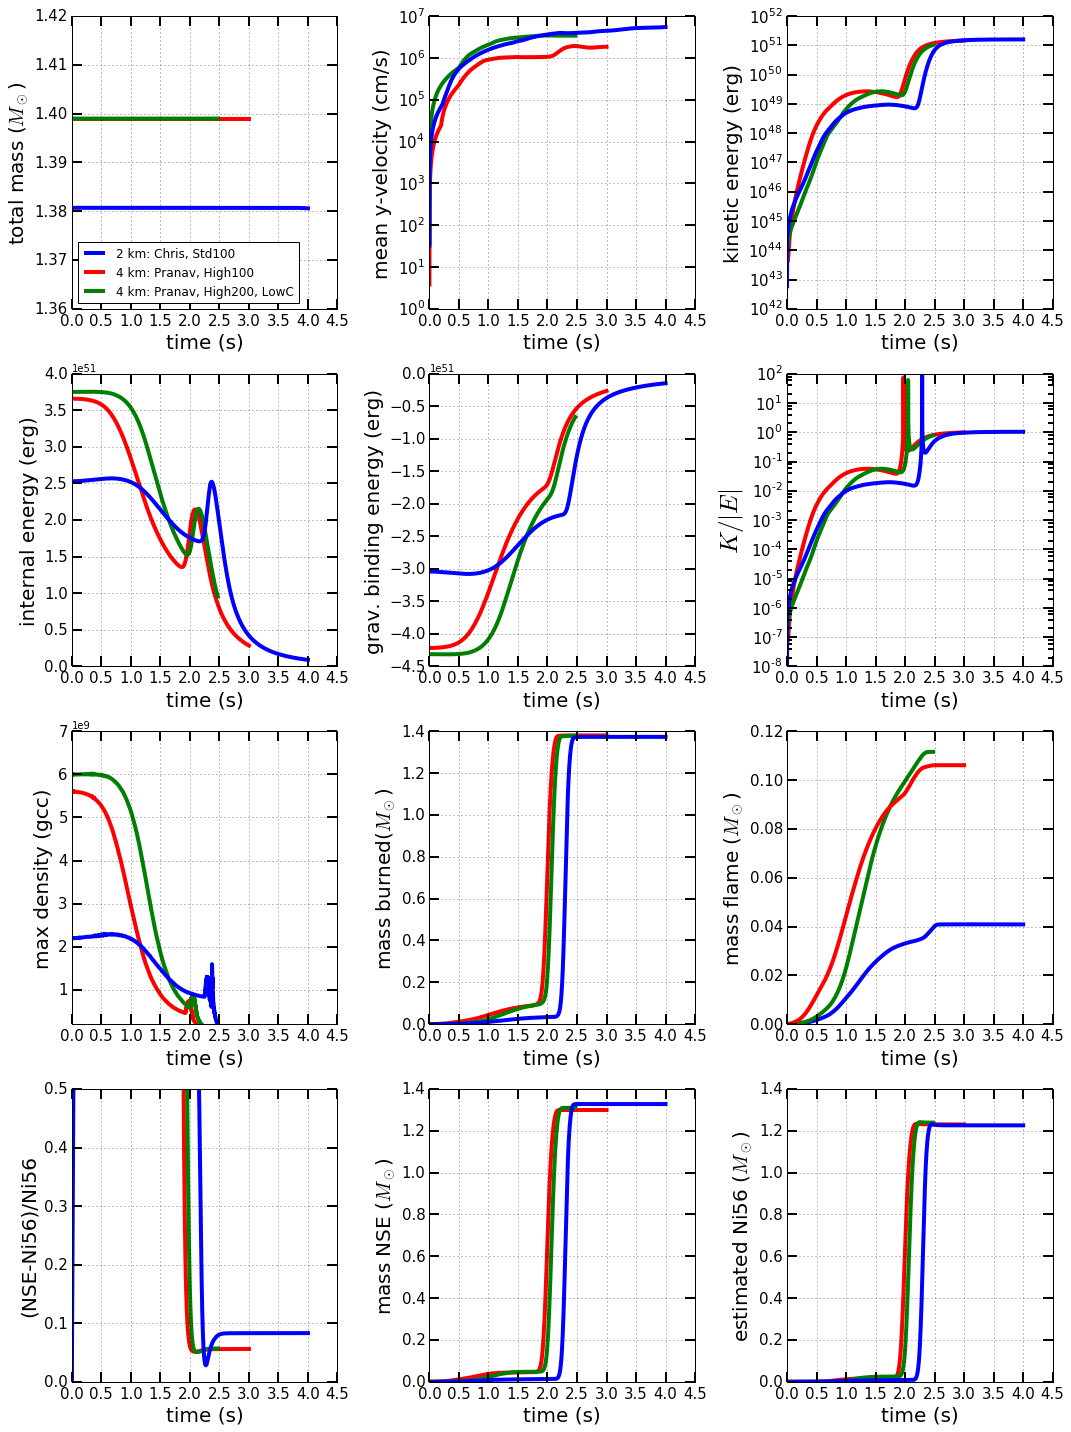

In [19]:
gcd  = np.genfromtxt('/home/pdave/output/denc6e9_blankrun/4_19_worked/gcd.dat',skip_header=True)
gcd  = gcd.transpose()
# time:0, mass:1, x-mom:2, y-mom:3, z-mom:4, eintkin:5, ekin:6, eint:7, egrav:8, enuc:9, enutloss:10, massburned:11, massnsqe:12,
# massnse:13, massflame:14, estni56:15, maxdens:26, maxqdot: 27

#hgcd  = np.genfromtxt('/home/pdave/output/cc7e8_gcd_pd/4_18_2016_0.1/hgcd.dat',skip_header=True)
hgcd  = np.genfromtxt('object_100km_gcd/gcd.dat',skip_header=True)
hgcd  = hgcd.transpose()
# time:0, mass:1, x-mom:2, y-mom:3, z-mom:4, eintkin:5, ekin:6, eint:7, egrav:8, enuc:9, enutloss:10, massburned:11, massnsqe:12,
# massnse:13, massflame:14, estni56:15, maxdens:26, maxqdot: 27

ddt = np.genfromtxt('/home/pdave/output/hotwd_GCD100km/ddt.dat',skip_header=True)
ddt = ddt.transpose()
# time:0, mass:1, x-mom:2, y-mom:3, z-mom:4, eintkin:5, ekin:6, eint:7, egrav:8, enuc:9, enutloss:10, massburned:11, massnsqe:12,
# massnse:13, massflame:14, estni56:15, maxdens:27

plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
plt.plot(ddt[0],ddt[1]/1.989e33,'b',lw=4,label='2 km: Chris, Std100')
plt.plot(gcd[0],gcd[1]/1.989e33,'r',lw=4,label='4 km: Pranav, High100')
plt.plot(hgcd[0],hgcd[1]/1.989e33,'g',lw=4,label='4 km: Pranav, High200, LowC')
plt.xlabel('time (s)',size=20)
plt.ylabel(r'total mass ($M_\odot$)',size=20)
plt.ylim(1.36,1.42)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=0)
plt.legend(loc=3,prop={'size':12})

plt.subplot(4,3,2)
plt.semilogy(gcd[0],np.abs(gcd[3]/gcd[1]),'r',lw=4)
plt.semilogy(hgcd[0],np.abs(hgcd[3]/hgcd[1]),'g',lw=4)
plt.semilogy(ddt[0],np.abs(ddt[3]/ddt[1]),'b',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel('mean y-velocity (cm/s)',size=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=0)

plt.subplot(4,3,3)
plt.semilogy(gcd[0],gcd[6],'r',lw=4)
plt.semilogy(hgcd[0],hgcd[6],'g',lw=4)
plt.semilogy(ddt[0],ddt[6],'b',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel('kinetic energy (erg)',size=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=0)

plt.subplot(4,3,4)
plt.plot(gcd[0],gcd[7],'r',lw=4)
plt.plot(hgcd[0],hgcd[7],'g',lw=4)
plt.plot(ddt[0],ddt[7],'b',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel('internal energy (erg)',size=20)
plt.grid(which='minor')
plt.grid(which='major')
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=3)

plt.subplot(4,3,5)
plt.plot(gcd[0],gcd[8],'r',lw=4)
plt.plot(hgcd[0],hgcd[8],'g',lw=4)
plt.plot(ddt[0],ddt[8],'b',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel('grav. binding energy (erg)',size=20)
plt.grid(which='both')
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

plt.subplot(4,3,6)
plt.semilogy(gcd[0],gcd[6]/np.abs(gcd[6]+gcd[7]+gcd[8]),'r',lw=4)
plt.semilogy(hgcd[0],hgcd[6]/np.abs(hgcd[6]+hgcd[7]+hgcd[8]),'g',lw=4)
plt.semilogy(ddt[0],ddt[6]/np.abs(ddt[6]+ddt[7]+ddt[8]),'b',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel(r'$K/{|E|}$',size=25)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

plt.subplot(4,3,7)
plt.plot(gcd[0],gcd[26],'r',lw=4)
plt.plot(hgcd[0],hgcd[26],'g',lw=4)
plt.plot(ddt[0],ddt[27],'b',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel('max density (gcc)',size=20)
plt.ylim(0.2e9,7.e9)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

#plt.subplot(3,3,8)
#plt.semilogy(gcd[0],gcd[27],'r',lw=4)
#plt.ylim(1.e18,1.e22)
#plt.xlabel('time (s)',size=20)
#plt.ylabel('maximum qdot (erg/s)',size=20)
#plt.grid()
#plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
#plt.tick_params(axis='both', which='minor', width=2, length=5)

plt.subplot(4,3,8)
plt.plot(gcd[0],gcd[11]/1.989e33,'r',lw=4)
plt.plot(hgcd[0],hgcd[11]/1.989e33,'g',lw=4)
plt.plot(ddt[0],ddt[11]/1.989e33,'b',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel(r'mass burned($M_\odot$)',size=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

plt.subplot(4,3,9)
plt.plot(ddt[0],ddt[14]/1.989e33,'b',lw=4)
plt.plot(hgcd[0],hgcd[14]/1.989e33,'g',lw=4)
plt.plot(gcd[0],gcd[14]/1.989e33,'r',lw=4)

plt.xlabel('time (s)',size=20)
plt.ylabel(r'mass flame ($M_\odot$)',size=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

plt.subplot(4,3,10)
plt.plot(gcd[0],(gcd[13]-gcd[15])/gcd[15],'r',lw=4)
plt.plot(hgcd[0],(hgcd[13]-hgcd[15])/hgcd[15],'g',lw=4)
plt.plot(ddt[0],(ddt[13]-ddt[15])/ddt[15],'b',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel(r'(NSE-Ni56)/Ni56',size=20)
plt.ylim(0.0,0.5)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

plt.subplot(4,3,11)
plt.plot(gcd[0],gcd[13]/1.989e33,'r',lw=4)
plt.plot(hgcd[0],hgcd[13]/1.989e33,'g',lw=4)
plt.plot(ddt[0],ddt[13]/1.989e33,'b',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel(r'mass NSE ($M_\odot$)',size=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

plt.subplot(4,3,12)
plt.plot(gcd[0],gcd[15]/1.989e33,'r',lw=4)
plt.plot(hgcd[0],hgcd[15]/1.989e33,'g',lw=4)
plt.plot(ddt[0],ddt[15]/1.989e33,'b',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel(r'estimated Ni56 ($M_\odot$)',size=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

#plt.subplot(4,3,12)
#plt.semilogy(gcd[0],gcd[27],'r',lw=4)
#plt.xlabel('time (s)',size=20)
#plt.ylabel(r'estimated Ni56 ($M_\odot$)',size=20)
#plt.grid()
#plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
#plt.tick_params(axis='both', which='minor', width=2, length=5)



plt.tight_layout()
plt.show()

In [ ]:
ds = load('/home/pdave/flash4_retownsley/build/object_gcd/gcd_hdf5_plt_cnt_0000069')
time = ds.current_time
angle = 0.0
gcd  = np.genfromtxt('object_gcd/gcd.dat',skip_header=True)
gcd  = gcd.transpose()
for x in xrange(len(gcd[0])):
    if(gcd[0][x]<=time):
        angle = gcd[28][x]
#ds = load('/home/pdave/output/hotwd_GCD100km/ddt_hdf5_plt_cnt_000125')
#ds = load('/home/pdave/output/hotwd_GCD100km/ddt_hdf5_plt_cnt_000017')
print ds.field_list
#plotvar = 'ye  '
#plotvar  = 'temp'
plotvar = 'phqn'
p = SlicePlot(ds, 'theta', plotvar,origin='native')
p.set_buff_size(1600)
p.zoom(32)
p.set_center((-0.5,-0.0))
p.pan_rel((0.5, 0.0))
lowdens = 1.e7
#p.set_colorbar_label(plotvar,'Temperature (K)')
#p.set_colorbar_label(plotvar,r'$\phi\;_\mathrm{fa}$')

phfa01  = 0.1
phfa05  = 0.5
phfa09  = 0.9
p.annotate_grids()
p.annotate_title('GCD: 200 km offset, Resolution: 4 km, CONe: 307000')
p.annotate_contour('dens',ncont=1, clim=(lowdens,lowdens),plot_args={"colors": "black",
                            "linewidths": 8})

#p.annotate_line((0.0, 0.5), (1.0*np.tan(angle/180.*np.pi), 0.0), coord_system='axis')
#p.annotate_line((0.0, 0.5), (1.0*np.tan(15./180.*np.pi), 0.0), coord_system='axis')
#p.annotate_contour('flam',ncont=1, clim=(phfa05,phfa05),plot_args={"colors": "black",
#                            "linewidths": 2,"linestyles":"-"})
#p.annotate_contour('flam',ncont=1, clim=(phfa01,phfa01),plot_args={"colors": "black",
#                            "linewidths": 2,"linestyles":"--"})


p.set_log(plotvar,False)
p.set_cmap(plotvar,'summer')
p.set_zlim(plotvar,0.0,1.0)
#p.set_cmap(plotvar,'RdBu_r')
#p.set_cmap(plotvar,'OrRd')
#p.set_cmap(plotvar,'algae_r')
#p.set_zlim(plotvar,0.5,0.45)
#p.set_zlim('dens',1.e9,5.6e9)
p.annotate_timestamp(corner='upper_right', draw_inset_box=True,time_unit='s',time_format='t = {time:1.2f} {units}')
#p.set_zlim(plotvar,5.e6, 5.e9)
p.show()
d = ds.h.all_data()
print d['dr'].min()/1.e5
print angle

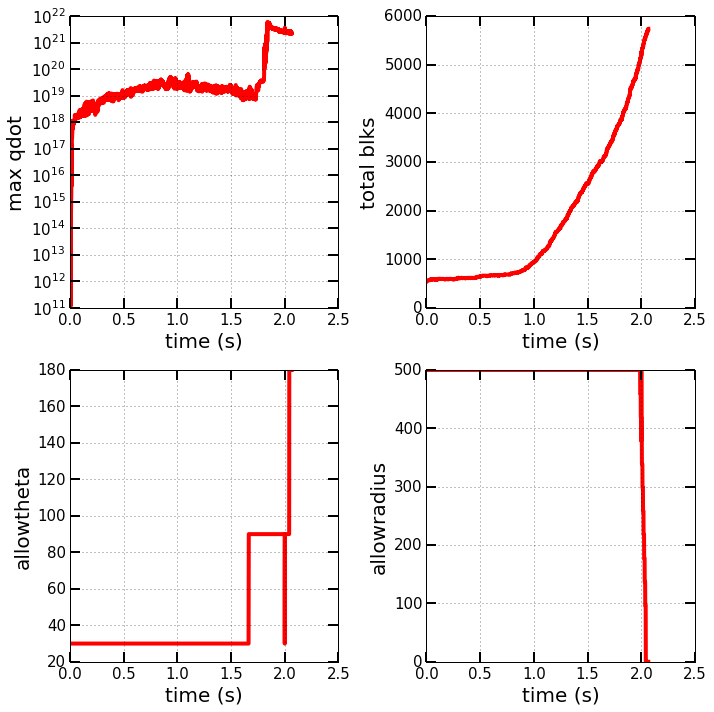

2.06501716924


In [8]:
gcd  = np.genfromtxt('object_100km_gcd/gcd.dat',skip_header=True)
gcd  = gcd.transpose()
# time:0, mass:1, x-mom:2, y-mom:3, z-mom:4, eintkin:5, ekin:6, eint:7, egrav:8, enuc:9, enutloss:10, massburned:11, massnsqe:12,
# massnse:13, massflame:14, estni56:15, maxdens:26, maxqdot: 27
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.semilogy(gcd[0],gcd[27],'r',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel(r'max qdot',size=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

plt.subplot(2,2,2)
plt.plot(gcd[0],gcd[10],'r',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel(r'total blks',size=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

plt.subplot(2,2,3)
plt.plot(gcd[0],gcd[28],'r',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel(r'allowtheta',size=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

plt.subplot(2,2,4)
plt.plot(gcd[0],gcd[29]/1.e5,'r',lw=4)
plt.xlabel('time (s)',size=20)
plt.ylabel(r'allowradius',size=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=15, width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=5)

plt.tight_layout()
plt.show()
print gcd[0].max()

In [10]:
!tail -5 object_100km_gcd/gcd.dat
#!grep 'theta' object_snia_gcd/flash.par
#!grep 'bn_allowtheta' object_snia_gcd/Burn.F90
!tail ~/1*
#!cat object_snia_gcd/flash.par

  2.067679640700706312E+00  2.782579515083019551E+33  2.997095753060063144E+41 -9.504965482674832131E+39  0.000000000000000000E+00  1.975531980137808122E+51  7.035680678362030904E+49  1.905175173354188685E+51 -1.833543525756887598E+51 -2.188389813350509740E+52  5.778000000000000000E+03  1.434044607780236013E+33  1.346998027973756895E+33  1.299335372712179669E+33  2.029631533326178049E+32  1.231030668333917606E+33  0.000000000000000000E+00  4.233298101978474916E+32  1.419934621893953322E+33  2.129366304880828852E+33  2.274977299195634068E+33  2.362030722090791233E+33  2.455129674323734171E+33  2.512139631808817936E+33  2.610065472294804525E+33  2.703399024795120533E+33  8.294885710418685675E+08  2.303657526856380580E+21  1.800000000000000000E+02  0.000000000000000000E+00
  2.067894315992573784E+00  2.782579515083029927E+33  3.003858887634760985E+41 -9.504818119450580807E+39  0.000000000000000000E+00  1.977023519827197708E+51  7.059092407371923768E+49  1.906432595753487733E+51 -1.8331248

In [ ]:
for x in xrange(24,33):
    n=x*5
    if(n<10):
        fname = 'object_gcd/gcd_hdf5_plt_cnt_000'+str(n)
    elif(n>=10 and n<100):
        fname = 'object_gcd/gcd_hdf5_plt_cnt_00'+str(n)
    else:
        fname = 'object_gcd/gcd_hdf5_plt_cnt_0'+str(n)
    ds = load(fname)
    fig = plt.figure()
    grid = AxesGrid(fig, (0.1,0.1,2.0,2.0),
                    nrows_ncols = (1, 3),
                    axes_pad = 1.0,
                    label_mode = "L",
                    share_all = True,
                    cbar_location="right",
                    cbar_mode="each",
                    cbar_size="3%",
                    cbar_pad="0%")
    
    fields = ['temp', 'ye  ','phfa']
    p = SlicePlot(ds, 'theta', fields,origin='native')
    p.set_buff_size(1600)
    p.zoom(25)
    p.set_center((-0.5,-0.0))
    p.pan_rel((0.5, 0.0))
    #p.annotate_grids()
    lowdens = 1.e7
    p.annotate_contour('dens',ncont=1, clim=(lowdens,lowdens),plot_args={"colors": "black",
                                "linewidths": 6})
    p.annotate_timestamp(corner='lower_right', draw_inset_box=True,time_unit='s',time_format='t = {time:1.2f} {units}')
    p.set_colorbar_label(fields[0],r'$\mathrm{Temperature}$')
    p.set_colorbar_label(fields[1],r'$\mathrm{Ye}$')
    p.set_colorbar_label(fields[2],r'$\mathrm{Phfa}$')
    
    p.set_zlim(fields[0], 5.e6, 5.e9)
    
    p.set_log(fields[1],False)
    p.set_cmap(fields[1],'Spectral')
    p.set_zlim(fields[1], 0.45e0 ,0.5e0)
    
    p.set_log(fields[2],False)
    p.set_cmap(fields[2],'summer')
    p.set_zlim(fields[2], 0.0e0 ,1.0e0)
    
    for i, field in enumerate(fields):
        plot = p.plots[field]
        plot.figure = fig
        plot.axes = grid[i].axes
        plot.cax = grid.cbar_axes[i]
    p._setup_plots()
    plt.show()

In [ ]:
def slam(rho,x12):
    rho=rho/1.e9
    slam = 1.
    slam = slam*(23.26*rho+37.34*rho**1.1-1.288)
    slam = slam*(0.3883*x12/0.5+0.09773*(x12/0.5)**3.)
    return slam*1.e5

rho = np.linspace(1.e9,8.e9,8)
A   = 0.09
G   = 6.67e-8
def fpl(off,x12):
    off = off*1.e5
    g   = G*rho*4./3.*np.pi*off
    fpl = 4.*np.pi*slam(rho,x12)**2./(A*g)
    return fpl
plt.plot(rho,fpl(100,0.5)/1.e5,label='100 km, 0.5')
plt.plot(rho,fpl(200,0.5)/1.e5,label='200 km, 0.5')
plt.plot(rho,fpl(100,0.3)/1.e5,label='100 km, 0.3')
plt.plot(rho,fpl(200,0.3)/1.e5,label='200 km, 0.3')
plt.ylim(0,20)
plt.legend(loc=2)

yt : [INFO     ] 2016-05-24 23:34:35,318 xlim = 0.000000 6553600000.000000
yt : [INFO     ] 2016-05-24 23:34:35,319 ylim = -6553600000.000000 6553600000.000000
yt : [INFO     ] 2016-05-24 23:34:35,325 xlim = 0.000000 6553600000.000000
yt : [INFO     ] 2016-05-24 23:34:35,326 ylim = -6553600000.000000 6553600000.000000
yt : [INFO     ] 2016-05-24 23:34:35,328 Making a fixed resolution buffer of (('flash', 'xni56')) 800 by 800
yt : [INFO     ] 2016-05-24 23:34:39,932 Making a fixed resolution buffer of (('flash', 'xige')) 800 by 800
yt : [INFO     ] 2016-05-24 23:34:41,500 xlim = -131072000.500000 131071999.500000
yt : [INFO     ] 2016-05-24 23:34:41,501 ylim = -262144000.000000 262144000.000000
yt : [INFO     ] 2016-05-24 23:34:41,507 Making a fixed resolution buffer of (('flash', 'xni56')) 800 by 800
yt : [INFO     ] 2016-05-24 23:34:41,590 Making a fixed resolution buffer of (('flash', 'xige')) 800 by 800


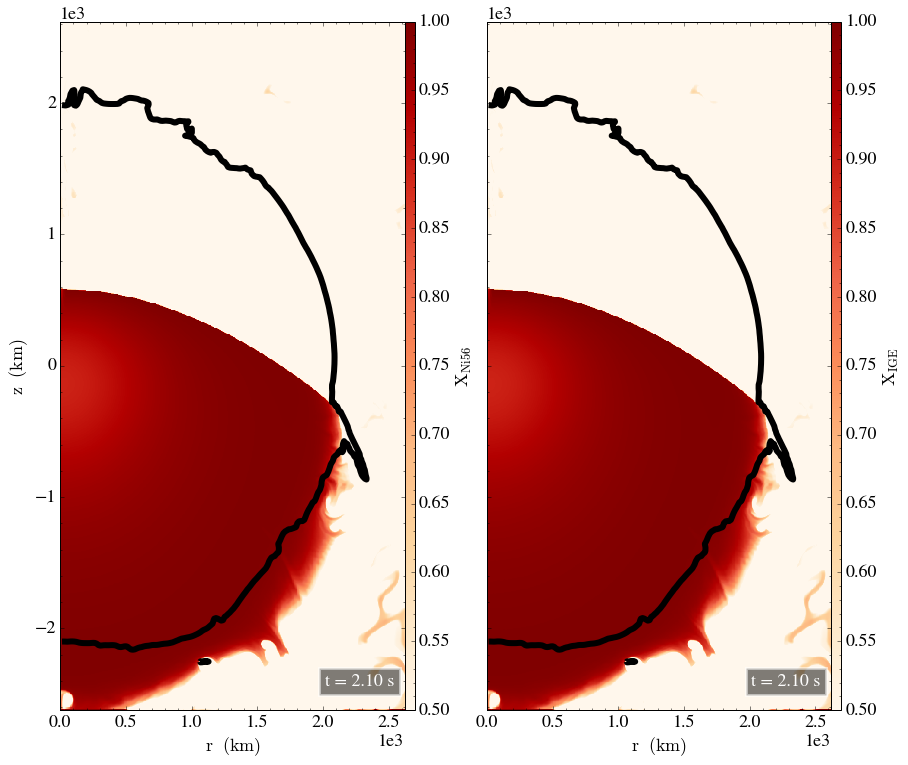

In [15]:
def _xni56(field, data):
    yen = ((data["ye  "]-(1.0-data["phqn"])*0.5)/data["phqn"])
    xni56 = np.fmin(1.0, np.fmax(0.0, (yen-0.48212)/(0.5-0.48212) ))
    return xni56*data["phqn"]

def _xige(field,data):
    return np.fmin(1.0, np.fmax(0.0, data['phqn']-data['xni56']))

ds = load('/home/pdave/flash4_retownsley/build/object_100km_gcd/gcd_hdf5_plt_cnt_0000210')
ds.add_field("xni56", function=_xni56, units="",force_override=True)
ds.add_field("xige", function=_xni56, units="",force_override=True)
fig = plt.figure()
grid = AxesGrid(fig, (0.1,0.1,1.0,1.0),
                nrows_ncols = (1, 2),
                axes_pad = 1.0,
                label_mode = "L",
                share_all = True,
                cbar_location="right",
                cbar_mode="each",
                cbar_size="3%",
                cbar_pad="0%")

fields = ['xni56','xige']
p = SlicePlot(ds, 'theta', fields,origin='native')
#p.set_buff_size(1600)
p.zoom(25)
p.set_center((-0.5,-0.0))
p.pan_rel((0.5, 0.0))
#p.annotate_grids()
lowdens = 1.e7
p.annotate_contour('dens',ncont=1, clim=(lowdens,lowdens),plot_args={"colors": "black",
                            "linewidths": 6})
p.annotate_timestamp(corner='lower_right', draw_inset_box=True,time_unit='s',time_format='t = {time:1.2f} {units}')
p.set_colorbar_label(fields[0],r'$\mathrm{X}_\mathrm{Ni56}$')
p.set_colorbar_label(fields[1],r'$\mathrm{X}_\mathrm{IGE}$')


p.set_log(fields[0],False)
p.set_cmap(fields[0],'OrRd')
p.set_zlim(fields[0], 0.5e0 ,1.0e0)

p.set_log(fields[1],False)
p.set_cmap(fields[1],'OrRd')
p.set_zlim(fields[1], 0.5e0 ,1.0e0)

for i, field in enumerate(fields):
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]
p._setup_plots()
plt.show()

In [ ]:
d = ds.h.all_data()
